<a href="https://colab.research.google.com/github/awazbhujel/MachineLearning/blob/main/ensemble_technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import xgboost as xgb

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.datasets import make_circles

In [46]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [47]:
classifier = xgb.XGBClassifier(learning_rate=0.01,max_depth=3,n_estimators=800)

In [48]:
regressor = xgb.XGBRFRegressor()

In [49]:
param_grid = {
    "max_depth":[3,5,8,10,15],
    "learning_rate":[0.02,0.1,0.01,0.001,1.0],
    "n_estimators":[50,100,200,400,600,500,800,1000]
}

In [50]:
grid_search_classifier = GridSearchCV(estimator=classifier,param_grid=param_grid,cv=5,scoring="accuracy")

In [51]:
grid_search_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=3,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=800, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.02, 0.1, 0.01, 0.001, 1.0],
                         'max_depth': [3, 5, 8, 10, 15],
                         'n_estimators': [50, 100, 200, 400, 600, 500, 800,
                                          1000]},
             scoring='accuracy')

In [52]:
grid_search_classifier.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 800}

In [53]:
grid_search_classifier.best_score_

0.8275

In [54]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=800, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

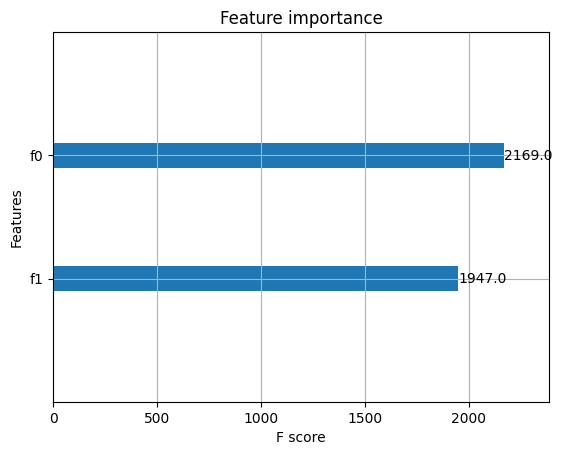

In [55]:
xgb.plot_importance(classifier)
plt.show()

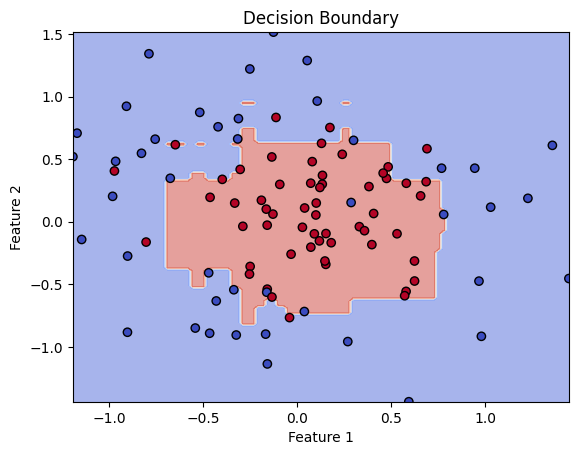

In [56]:
x1 = X_test[:, 0]
x2 = X_test[:, 1]

# Create a grid of points for plotting the decision boundary
x1_range = np.linspace(min(x1), max(x1), 100)
x2_range = np.linspace(min(x2), max(x2), 100)
xx1, xx2 = np.meshgrid(x1_range, x2_range)
grid = np.c_[xx1.ravel(), xx2.ravel()]

# Predict class labels for the grid
grid_preds = classifier.predict(grid).reshape(xx1.shape)

# Plot decision boundary
plt.contourf(xx1, xx2, grid_preds, cmap=plt.cm.coolwarm, alpha=0.5)
plt.scatter(x1, x2, c=y_test, cmap=plt.cm.coolwarm, marker='o', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.show()

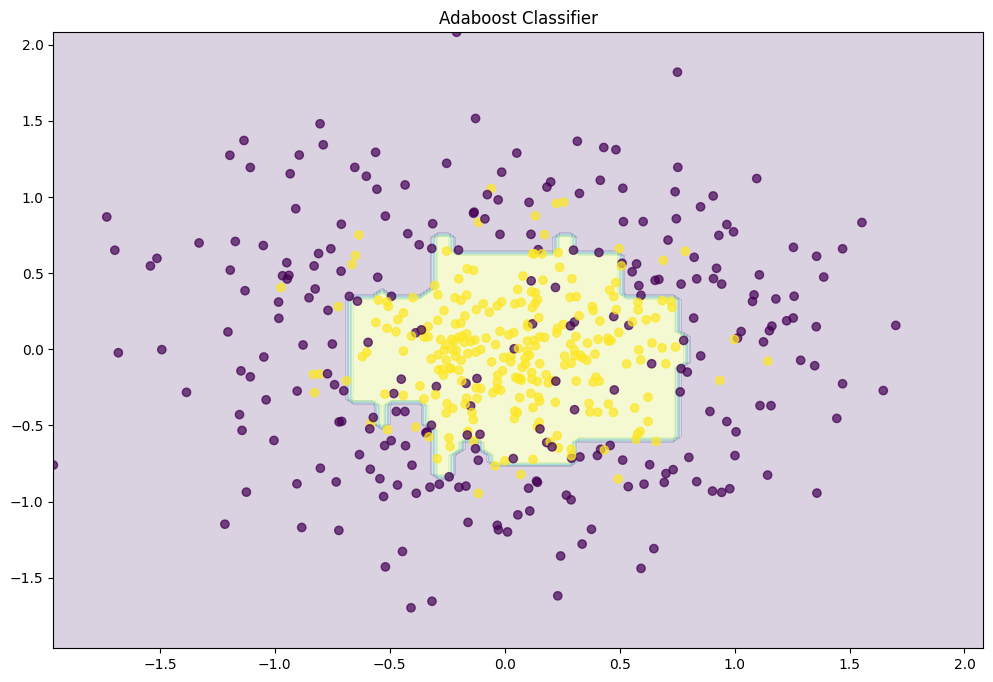

In [57]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12, 8))
    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
    plt.title("Adaboost Classifier")
    plt.show()

plot_decision_boundary(classifier)

In [58]:
y_pred=classifier.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
accuracy_score(y_test,y_pred)*100

89.0

In [61]:
classifier1 = xgb.XGBClassifier()

In [62]:
classifier1.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [63]:
y_pred1=classifier1.predict(X_test)

In [64]:
accuracy_score(y_test,y_pred1)*100

85.0

In [65]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [66]:
bc = BaggingClassifier()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
lr = LogisticRegression()

In [67]:
bc.fit(X_train,y_train)
y_pred = bc.predict(X_test)
accuracy_score(y_test,y_pred)*100

85.0

In [68]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)*100

86.0

In [69]:
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test,y_pred)*100

85.0

In [70]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test,y_pred)*100

34.0

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
np.mean(cross_val_score(classifier,X_train,y_train,cv=5,scoring="accuracy")*100)

82.75

In [73]:
param_grid1 = {"n_estimators":[50,100,120,130],
               "max_features":[0.1,0.2,0.5,1.0],
               "max_depth":[2,8,10,12,None],
               "max_samples":[0.2,0.5,0.75]}

In [74]:
rf_grid=GridSearchCV(rf,param_grid=param_grid1,cv=2,n_jobs=-1)

In [75]:
rf_grid.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, 10, 12, None],
                         'max_features': [0.1, 0.2, 0.5, 1.0],
                         'max_samples': [0.2, 0.5, 0.75],
                         'n_estimators': [50, 100, 120, 130]})

In [76]:
rf_grid.best_params_

{'max_depth': 10, 'max_features': 0.1, 'max_samples': 0.2, 'n_estimators': 130}

In [77]:
rf_grid.best_score_

0.8200000000000001

In [78]:
rf1 =RandomForestClassifier(max_depth=12,max_features=0.1,max_samples=0.2,n_estimators=100)

In [79]:
np.mean(cross_val_score(rf1,X_train,y_train,cv=5,scoring="accuracy")*100)

81.5

In [80]:
# Define the grid of parameters to search over
param_grid3 = {
    'eta': [0.1, 0.3, 0.5],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9]
}

In [81]:
X_train.shape

(400, 2)

In [82]:
import xgboost as xgb

In [101]:
clf = xgb.XGBClassifier(learning_rate=0.01,n_estimators=500,max_depth=3)

In [102]:
clf.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [103]:
y_pred4=clf.predict(X_test)

In [104]:
accuracy_score(y_test,y_pred4)

0.89

In [105]:
np.mean(cross_val_score(clf,X_train,y_train,scoring="accuracy",cv=5)*100)

82.25

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

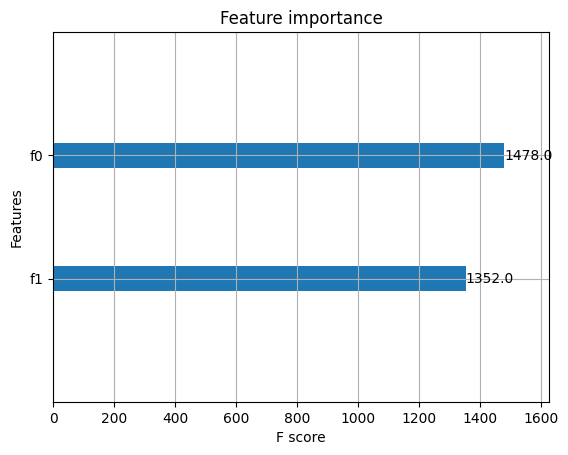

In [106]:
xgb.plot_importance(clf)

In [89]:
clf1 = xgb.XGBClassifier()

In [90]:
param_grid = {"learning_rate":[0.01,0.1,0.01,0.5],
              "n_estimators":[100,200,500],
              "max_depth":[3,5,7],
              "max_samples":[0.2,0.5,0.75],
              'subsample': [0.5, 0.7, 0.9],
                'colsample_bytree': [0.5, 0.7, 0.9]}

In [92]:
clf1_grid=GridSearchCV(clf1,param_grid=param_grid,scoring="accuracy",cv=5,n_jobs=-1)

In [93]:
clf1_grid.fit(X_train,y_train)

[16:30:14] WARNING: ../src/learner.cc:767: 
Parameters: { "max_samples" } are not used.



GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.7, 0.9],
                         'learning_rate': [0.01, 0.1, 0.01, 0.5],
                         'max_depth': [3, 5, 7],
                         'max_samples': [0.2, 0.5, 0.75],
                         'n_estimators': [100, 200, 500],
                         'subsample': [0.5, 0.7, 0.9]},
             scoring='accuracy')

In [94]:
clf1_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 3,
 'max_samples': 0.2,
 'n_estimators': 500,
 'subsample': 0.5}

In [95]:
clf1_grid.best_score_

0.8275

In [107]:
from sklearn.ensemble import AdaBoostClassifier

In [149]:
ada = AdaBoostClassifier(learning_rate=1.0,n_estimators=500)

In [150]:
ada.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=500)

In [151]:
y_pred_ada=ada.predict(X_test)

In [152]:
accuracy_score(y_test,y_pred_ada)*100

79.0

In [153]:
np.mean(cross_val_score(ada,X_train,y_train,cv=5,scoring="accuracy")*100)

77.5

In [128]:
ada_grid = {"n_estimators":[10,100,500],
            "learning_rate":[0.1,0.01,0.5,1.0],
            "algorithm":['SAMME', 'SAMME.R']}

In [129]:
grid_search = GridSearchCV(estimator=ada, param_grid=ada_grid, n_jobs=-1, cv=10, scoring='accuracy')

In [130]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.01, 0.5, 1.0],
                         'n_estimators': [10, 100, 500]},
             scoring='accuracy')

In [131]:
grid_search.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 500}

In [132]:
grid_search.best_score_

0.82

In [154]:
from sklearn.ensemble import RandomForestClassifier

In [182]:
rf2 = RandomForestClassifier(n_estimators=100,max_depth=8,max_features=0.5,oob_score=True)

In [183]:
rf2.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_features=0.5, oob_score=True)

In [184]:
rf_pred=rf2.predict(X_test)

In [185]:
accuracy_score(y_test,rf_pred)

0.9

In [186]:
np.mean(cross_val_score(rf2,X_train,y_train,cv=5,scoring="accuracy")*100)

80.25

In [166]:
rf_param = {
    "n_estimators":[60,100,300,500],
    "max_features":[0.2,0.5,0.7,1.0],
    "max_depth":[2,8,10,None],
    "max_samples":[0.2,0.5,0.7],
    "bootstrap":[True,False]
}

In [167]:
rf2_grid=GridSearchCV(rf2,param_grid=rf_param,cv=3,scoring="accuracy",n_jobs=-1)

In [168]:
rf2_grid.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
576 fits failed out of a total of 1152.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
576 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 397, in fit
    raise ValueError(
ValueError: `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sample=None`.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/li

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 8, 10, None],
                         'max_features': [0.2, 0.5, 0.7, 1.0],
                         'max_samples': [0.2, 0.5, 0.7],
                         'n_estimators': [60, 100, 300, 500]},
             scoring='accuracy')

In [169]:
rf2_grid.best_params_

{'bootstrap': True,
 'max_depth': 8,
 'max_features': 0.5,
 'max_samples': 0.2,
 'n_estimators': 100}

In [170]:
rf2_grid.best_score_

0.8150413346799835

In [189]:
rf2.oob_score_

0.815

In [190]:
dt1 = DecisionTreeClassifier()

In [192]:
dt1.fit(X_train,y_train)

DecisionTreeClassifier()

In [194]:
dt_pred=dt1.predict(X_test)

In [195]:
accuracy_score(y_test,dt_pred)

0.85

In [196]:
np.mean(cross_val_score(rf2,X_train,y_train,cv=5,scoring="accuracy")*100)

80.5

In [205]:
dt_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    "max_features":[1,2,3],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']}

In [206]:
dt_param=GridSearchCV(dt1,param_grid=dt_grid,scoring="accuracy",cv=3)

In [207]:
dt_param.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': [1, 2, 3],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [208]:
dt_param.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'splitter': 'random'}

In [209]:
dt_param.best_score_

0.8024164889836531